In [6]:
#imports
#KMeans
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/saihaneesh26/ML_lab/main/datasets/ColourXY.csv')
df

,x,y,color
0,144.475109,101.450265,0
1,370.683312,298.003415,2
2,253.714046,234.079402,1
3,148.699165,78.654006,0
4,192.157973,252.837304,1
...,...,...,...
12524,141.967251,238.963257,1
12525,161.932857,67.972458,0
12526,122.451461,94.133502,0
12527,182.881854,114.104916,0


In [29]:
df = df.drop(['color'],axis=1) # bcoz we are supposed to predict the cluster it belong and we dont know how many clusters are present initially
df.dropna(inplace=True)

In [30]:
#scaling the data
scaler = StandardScaler()
df[ ['x','y'] ] = scaler.fit_transform(df[['x','y']])
df
#scaling req
#label encoder not req


,x,y
0,-1.147198,-1.245985
1,1.249969,1.214316
2,0.010426,0.414164
3,-1.102435,-1.531331
4,-0.641894,0.648962
...,...,...
12524,-1.173774,0.475297
12525,-0.962195,-1.665035
12526,-1.380586,-1.337571
12527,-0.740195,-1.087584


In [36]:
X = df['x'].to_numpy()
Y = df['y'].to_numpy() # conver to numpy
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,shuffle=True,random_state = 2)

In [49]:
train_data = []
for i in range(len(train_x)):
  train_data.append([train_x[i],train_y[i]])
train_data[:5]

[[-0.9741350642134801, -1.0901004656995408],
 [0.16757931556903977, -0.022203206498422327],
 [1.7464001000086613, 1.3226051391737412],
 [-0.6216892324793227, -0.14477831652045425],
 [-0.894202055972227, -0.9043209634813322]]

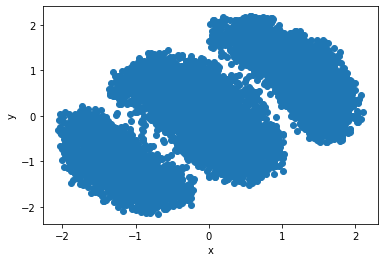

In [37]:
plt.scatter(train_x,train_y)
plt.xlabel("x")
plt.ylabel('y')
plt.show()

In [73]:
# elbow method using WCSS - within cluster sum
# so we find distance of all points in that cluster from that cluster sum and add them all
wcss = []

distances = []
for k in range(1,11):
  model = KMeans(n_clusters = k)
  model.fit(train_data)
  centers = model.cluster_centers_
  total_sum = 0
  wcss.append(model.inertia_)
  labels = model.labels_
  
  '''
  # now we find distance of a point from all cluster centers and take min coz it belongs to that center
  # for i in range(len(train_x)):
  #   x_cord = train_x[i]
  #   y_cord = train_y[i]
  #   dist = []
  #   for c in centers:
  #     dist.append(abs(x_cord-c[0])+abs(y_cord-c[1])) # euclidean
  #   total_sum+=min(dist)

  # distances.append(total_sum)
  '''

In [75]:
wcss

[17506.40502982841,
 7964.973974312294,
 4952.466039533385,
 3460.6604441936834,
 2509.552996620559,
 1926.7356142385202,
 1652.3723607023546,
 1423.0879831351408,
 1275.5741707000138,
 1156.9382056799354]

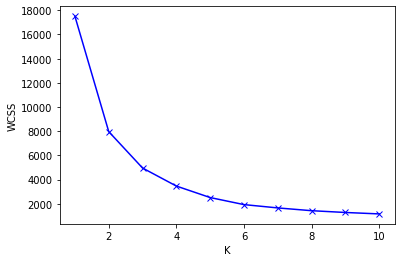

In [76]:
plt.plot([i for i in range(1,11)],wcss,'bx-')

plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

In [83]:
random_point = np.array([150,80])
scaled_ = scaler.transform(random_point.reshape(1,-1))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [84]:
scaled_

array([[-1.08864964, -1.51448337]])

In [85]:
model = KMeans(n_clusters = 3)
model.fit(train_data)

KMeans(n_clusters=3)

In [86]:
model.predict(scaled_.reshape(1,-1))

array([0], dtype=int32)

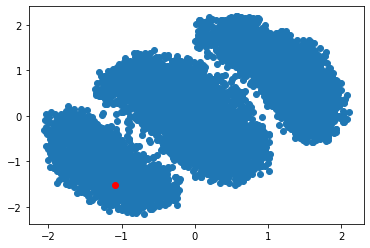

In [92]:
plt.scatter(train_x,train_y)
plt.scatter(scaled_[0][0],scaled_[0][1],color='red')